C:\Users\realc\OneDrive\Documents\GSOC


c:\Users\realc\OneDrive\Documents\GSOC\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:11<00:00, 869048.24it/s] 


Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 126145.96it/s]


Extracting mnist\MNIST\raw\train-labels-idx1-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:02<00:00, 567812.40it/s]


Extracting mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2501382.45it/s]


Extracting mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist\MNIST\raw

Loaded MNIST: 60000 samples
Image shape: (28, 28) | Label: 5


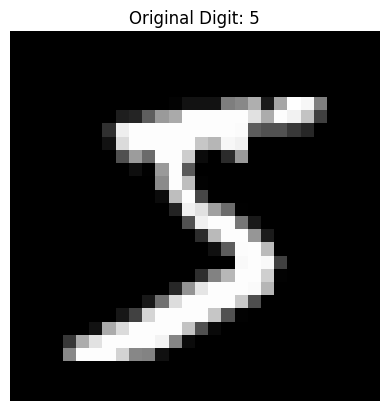

In [ ]:
%cd C:/Users/realc/OneDrive/Documents/GSOC

import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random

Loaded MNIST: 60000 samples
Image shape: (28, 28) | Label: 0


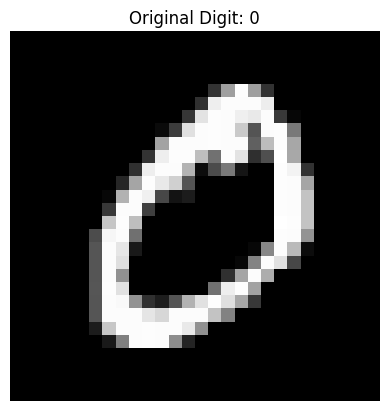

In [18]:
# Load MNIST (28x28 grayscale)
transform = transforms.Compose([
    transforms.ToTensor()
])

mnist = datasets.MNIST(root="mnist", train=True, download=True, transform=transform)
print("Loaded MNIST:", len(mnist), "samples")

# Pick one image
idx = 1
image, label = mnist[idx]
image = image.squeeze().numpy()
print("Image shape:", image.shape, "| Label:", label)

plt.imshow(image, cmap='gray')
plt.title(f"Original Digit: {label}")
plt.axis('off')
plt.show()


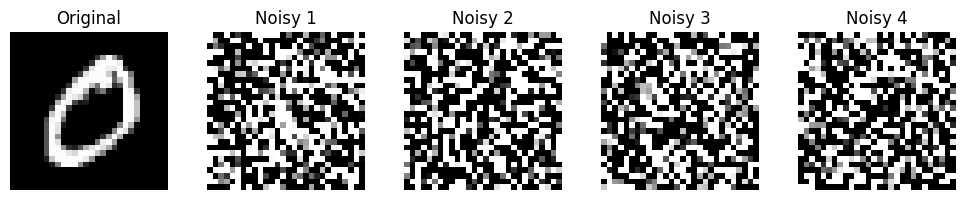

In [19]:
def add_gaussian_noise(img, mean=0, std=0.5):
    timesteps = 10
    for _ in range(timesteps):
        std = random.uniform(2, std)
        noise = np.random.normal(mean, std, img.shape)
        noisy = img + noise
    return np.clip(noisy, 0.0, 1.0)

# Generate 4 noisy versions of the same image, varying std
noisy_versions = [add_gaussian_noise(image, std=2) for _ in range(4)]

plt.figure(figsize=(10, 2))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, n in enumerate(noisy_versions):
    plt.subplot(1, 5, i+2)
    plt.imshow(n, cmap='gray')
    plt.title(f"Noisy {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
